# Tarea 2 - Regresion Polinomial & Feature engineering

### Parte 1 - Modelo exponencial de covid-19 usando feature-eng

Usando el ejemplo de covid-19 en el notebook de feature-eng (https://colab.research.google.com/drive/1sJV2HG7tQgCGKES3-dIclzHQJ9qAWB3b?usp=sharing) crear un modelo de covid-19 para Guatemala.

* Convertir la fecha a un entero "número de día", por ejemplo si se usan datos desde el 22 de abril, este es el día 0, el 23 es el día 1.
* Aplicar regresión lineal sobre la variable "Confirmed" transformada.
* Una vez entrenado el modelo usarlo para aproximar la cantidad de casos confirmados para el 30 de mayo. Se debe reportar la cantidad de casos, no la cantidad transformada obtenida.

In [68]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
# graficas
import seaborn as sns 
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime
import IPython
from datetime import datetime, timedelta
# from intertools import combinations
print(tf.__version__)
if tf.__version__.startswith("2."):
 import tensorflow.compat.v1 as tf
 tf.compat.v1.disable_v2_behavior()
 tf.compat.v1.disable_eager_execution()
 print("Enabled compatitility to tf1.x")

2.4.1
Enabled compatitility to tf1.x


In [2]:
data_covid = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
data_covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,181574,181666,181725,181808,181912,181987,182033,182072,182149,182228
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,277141,277409,277444,277663,277940,278211,278504,278793,279077,279077
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265971,265975,265985,265993,266006,266015,266025,266030,266038,266049
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43449,43774,43774,43774,43774,43774,43774
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,658100,658100,658503,658503,658503,658503,658503,658503,658503,659853
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11823,11823,11823,11824,11824,11824,11824,11824,11824,11824
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,324025,324288,324344,324558,324558,324922,325110,325110,325110,325348


In [3]:
data_covid = data_covid[data_covid['Country/Region'] == 'Guatemala']
data_covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
139,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,880169,880467,880715,880715,886747,889913,893071,896133,896850,897462


In [4]:
data_covid = data_covid.drop(['Lat', 'Long'], axis = 1)
data_covid

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
139,NaN,Guatemala,0,0,0,0,0,0,0,0,...,880169,880467,880715,880715,886747,889913,893071,896133,896850,897462


In [5]:
data_covid = data_covid.melt(id_vars=['Country/Region', 'Province/State'])
data_covid

,Country/Region,Province/State,variable,value
0,Guatemala,NaN,1/22/20,0
1,Guatemala,NaN,1/23/20,0
2,Guatemala,NaN,1/24/20,0
3,Guatemala,NaN,1/25/20,0
4,Guatemala,NaN,1/26/20,0
...,...,...,...,...
883,Guatemala,NaN,6/23/22,889913
884,Guatemala,NaN,6/24/22,893071
885,Guatemala,NaN,6/25/22,896133
886,Guatemala,NaN,6/26/22,896850


In [6]:
data_covid.rename(columns = {'variable': 'date', 'value':'confirmed'}, inplace = True)
data_covid


,Country/Region,Province/State,date,confirmed
0,Guatemala,NaN,1/22/20,0
1,Guatemala,NaN,1/23/20,0
2,Guatemala,NaN,1/24/20,0
3,Guatemala,NaN,1/25/20,0
4,Guatemala,NaN,1/26/20,0
...,...,...,...,...
883,Guatemala,NaN,6/23/22,889913
884,Guatemala,NaN,6/24/22,893071
885,Guatemala,NaN,6/25/22,896133
886,Guatemala,NaN,6/26/22,896850


In [7]:
# data_covid['date'] = pd.to_datetime(data_covid['date'], format="%m/%d/%Y ")
# data_covid
# data_covid['date'] = data_covid['date'].apply(lambda _: datetime.strptime(_,"%m/%d/%Y"))
# df
data_covid['date'] = pd.to_datetime(data_covid['date'])
data_covid.dtypes
data_covid

,Country/Region,Province/State,date,confirmed
0,Guatemala,NaN,2020-01-22,0
1,Guatemala,NaN,2020-01-23,0
2,Guatemala,NaN,2020-01-24,0
3,Guatemala,NaN,2020-01-25,0
4,Guatemala,NaN,2020-01-26,0
...,...,...,...,...
883,Guatemala,NaN,2022-06-23,889913
884,Guatemala,NaN,2022-06-24,893071
885,Guatemala,NaN,2022-06-25,896133
886,Guatemala,NaN,2022-06-26,896850


In [8]:
##casos confirmados a partir de la fecha 0
data_covid_c = data_covid[(data_covid['date'] > "2020/04/22") &  (data_covid['date'] < "2021/04/22")]
# data_covid.loc[:, "2020/04/22":].values.tolist()
data_covid_c

,Country/Region,Province/State,date,confirmed
92,Guatemala,NaN,2020-04-23,384
93,Guatemala,NaN,2020-04-24,430
94,Guatemala,NaN,2020-04-25,473
95,Guatemala,NaN,2020-04-26,500
96,Guatemala,NaN,2020-04-27,530
...,...,...,...,...
451,Guatemala,NaN,2021-04-17,212307
452,Guatemala,NaN,2021-04-18,212734
453,Guatemala,NaN,2021-04-19,213049
454,Guatemala,NaN,2021-04-20,214700


In [9]:
dias = list(range(len(data_covid_c)))
data_covid_c=data_covid_c.assign(dia=dias)
data_covid_c

,Country/Region,Province/State,date,confirmed,dia
92,Guatemala,NaN,2020-04-23,384,0
93,Guatemala,NaN,2020-04-24,430,1
94,Guatemala,NaN,2020-04-25,473,2
95,Guatemala,NaN,2020-04-26,500,3
96,Guatemala,NaN,2020-04-27,530,4
...,...,...,...,...,...
451,Guatemala,NaN,2021-04-17,212307,359
452,Guatemala,NaN,2021-04-18,212734,360
453,Guatemala,NaN,2021-04-19,213049,361
454,Guatemala,NaN,2021-04-20,214700,362


In [10]:
data_covid_confirmados = data_covid_c[data_covid_c['confirmed']>0]
data_covid_confirmados

,Country/Region,Province/State,date,confirmed,dia
92,Guatemala,NaN,2020-04-23,384,0
93,Guatemala,NaN,2020-04-24,430,1
94,Guatemala,NaN,2020-04-25,473,2
95,Guatemala,NaN,2020-04-26,500,3
96,Guatemala,NaN,2020-04-27,530,4
...,...,...,...,...,...
451,Guatemala,NaN,2021-04-17,212307,359
452,Guatemala,NaN,2021-04-18,212734,360
453,Guatemala,NaN,2021-04-19,213049,361
454,Guatemala,NaN,2021-04-20,214700,362


In [11]:
data_covid_confirmados = data_covid_confirmados[['dia','confirmed']]
data_covid_confirmados

,dia,confirmed
92,0,384
93,1,430
94,2,473
95,3,500
96,4,530
...,...,...
451,359,212307
452,360,212734
453,361,213049
454,362,214700


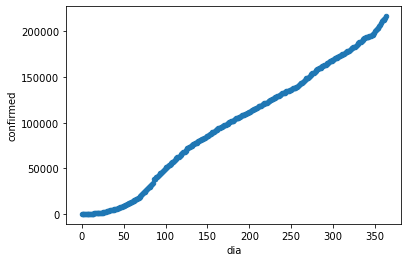

In [12]:
#Grafica del dataset
data_covid_confirmados.plot.scatter(x='dia', y='confirmed')
plt.show()

<p>Vemos que la serie no es totalmente lineal por lo que aplicamos ingenieria de caracteristicas y transformamos a logaritmo nuestra variable y</p>

In [13]:
data_covid_confirmados=data_covid_confirmados.assign(log_confirmed=np.log(data_covid_confirmados['confirmed']))

In [14]:
data_covid_confirmados

,dia,confirmed,log_confirmed
92,0,384,5.950643
93,1,430,6.063785
94,2,473,6.159095
95,3,500,6.214608
96,4,530,6.272877
...,...,...,...
451,359,212307,12.265789
452,360,212734,12.267798
453,361,213049,12.269277
454,362,214700,12.276997


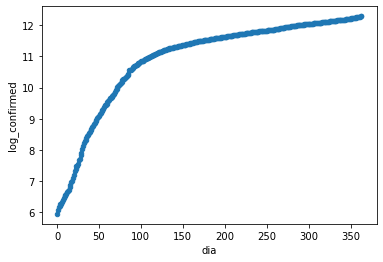

In [15]:
#Grafica del dataset
data_covid_confirmados.plot.scatter(x='dia', y='log_confirmed')
plt.show()

<p>Vemos que aun no es totalmente lineal por lo que vamos a aplicar una funcion cuadratica</p>


In [27]:
data_covid_confirmados=data_covid_confirmados.assign(cuad_confirmed=data_covid_confirmados['confirmed']**2)
data_covid_confirmados

,dia,confirmed,log_confirmed,cuad_confirmed
92,0,384,5.950643,147456
93,1,430,6.063785,184900
94,2,473,6.159095,223729
95,3,500,6.214608,250000
96,4,530,6.272877,280900
...,...,...,...,...
451,359,212307,12.265789,45074262249
452,360,212734,12.267798,45255754756
453,361,213049,12.269277,45389876401
454,362,214700,12.276997,46096090000


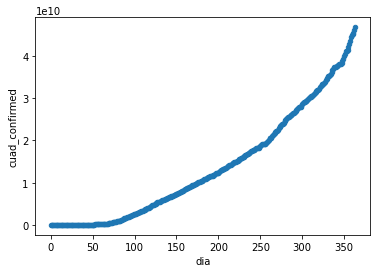

In [28]:
#Grafica del dataset
data_covid_confirmados.plot.scatter(x='dia', y='cuad_confirmed')
plt.show()

In [56]:
def c_grafo(filas, parametros):
    
    tf.reset_default_graph()
    grafo = tf.Graph()
    with grafo.as_default():
        tensor_x = tf.placeholder(tf.float32, [None, parametros], "tensor_x")
        tensor_y = tf.placeholder(tf.float32, [None, 1], "tensor_y")
        
        lr = tf.placeholder(dtype="float", name="lr")
        
        params = tf.Variable(tf.zeros((parametros, 1)), name="tetha", dtype=tf.float32)
        with tf.name_scope("Prediccion"):
            yhat = tf.matmul(tensor_x, parametros)
            
        with tf.name_scope("error"):
            error = tf.reduce_sum(tf.pow(yhat - tensor_y)) / (2 * filas)
            error_summary = tf.summary.scalar("error", error)
            
        gratidentes_parametros = tf.gradients(error, parametros)
        
        gradientes_print = tf.tuple(gratidentes_parametros, control_inputs=[])
        
        gradientes = tf.reshape(gradientes_print[0], tf.shape(params))
        
        with tf.name_scope("actualizacion"):
            delta_params = tf.assign(parametros, parametros - lr * gradientes)
            
        init = tf.global_variables_initializer()
    return grafo, init, [tensor_x,tensor_y], [lr, delta_params, error_summary, parametros, error]
            
        

In [48]:
def training(x,y,lr,epochs,dat):
    filas = x.shape[0]
    columnas = x.shape[1]
    
    grafo = c_grafo(filas, columnas)
    init = c_grafo(filas, columnas)
    regresion = c_grafo(filas, columnas)
    nodos = c_grafo(filas, columnas)
    x = regresion
    y = regresion
    
    lr = nodos[0]
    delta_params = nodos[1]
    error_summary = nodos[1]
    
    parametros = nodos[3]
    costo = nodos[4]
    
    with tf.Session(graph = grafo) as sess:
        tf.initialize_all_variables().run()
        writer = tf.summary.FileWriter(('./grafos/' + dat + '-lr=' + str(lr) + '-epochs=' + str(epochs) + 'feat=' + columnas), sess.graph)
        
        sess.run(init)
        
        inputs_grafo = {
            x: x,
            y: y,
            learning_rate: lr
        }
        
        for epoch in range(epochs):
            sess.run(delta_params, feed_dict=inputs_grafo)
            e= sess.run(error_summary, feed_dict=inputs_grafo)
            writer.add_summary(e, epoch)
            
        tetha = params.eval()
        error = costo.eval(feed_dict=inputs_grafo)
        
        writer.close()
    return tetha, error

In [57]:
x_data = np.arange(1, len(data_covid_confirmados['cuad_confirmed']) +1, 1)
x_train = np.reshape(x_data, (-1,1))
y_train = data_covid_confirmados['cuad_confirmed']

xtrain = np.c_[x_train, np.ones(data_covid_confirmados['dia'].shape)]

params_linreg, error = training(x_train, y_train, 0.00001, 10, "x1_y1")

ValueError: Shape must be rank 2 but is rank 0 for '{{node Prediccion/MatMul}} = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false](tensor_x, Prediccion/MatMul/b)' with input shapes: [?,1], [].

### Parte 2 - Modelo polinomial de calidad de vinos

Es permitido utilizar [sklearn.preprocessing.polynomialfeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

In [18]:
import pandas as pd

In [19]:
data = pd.read_csv('winequality-red.csv')


### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



In [20]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [58]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


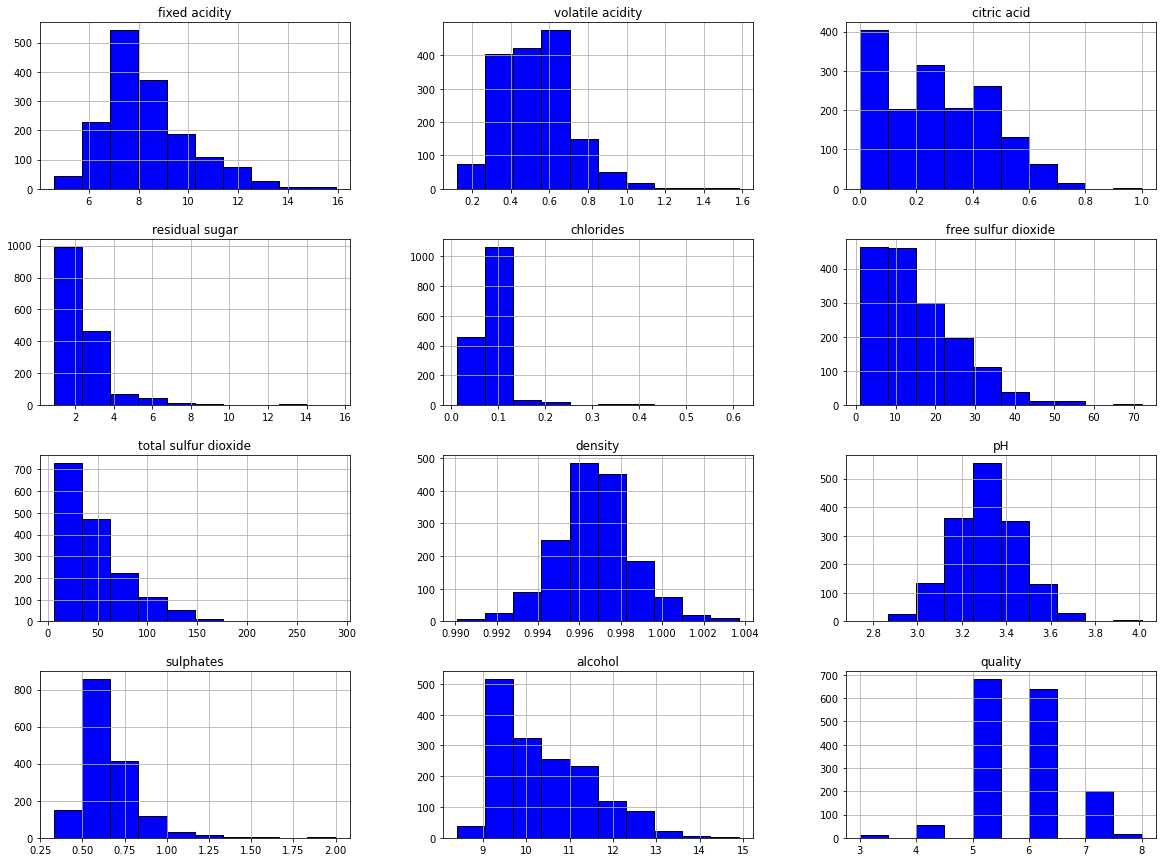

In [60]:
data.hist(edgecolor="black", color="blue",figsize=(20,15))
plt.show()

/var/folders/rl/659_2p794j73tgklrf6382lw0000gn/T/ipykernel_31540/357860623.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10,5))


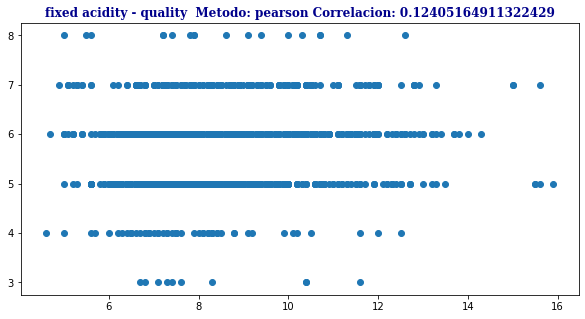

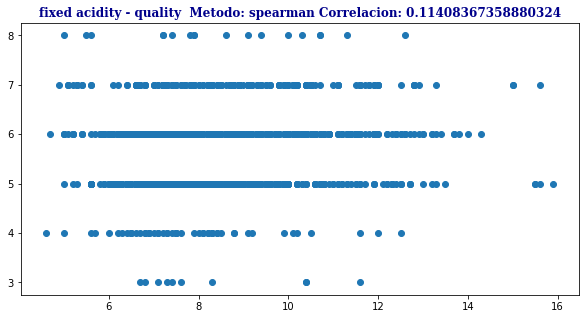

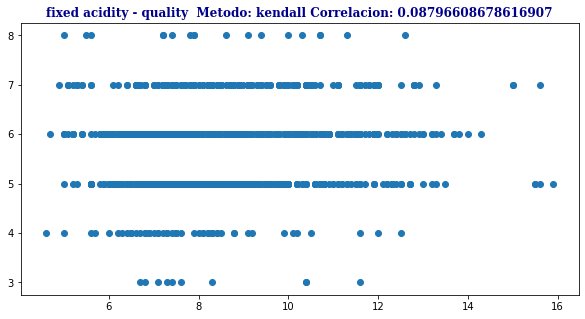

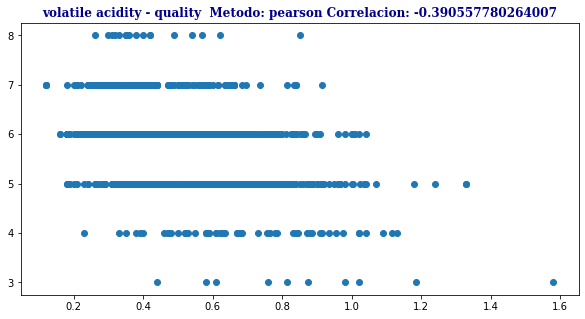

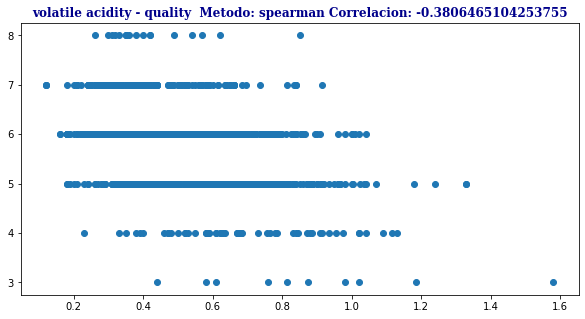

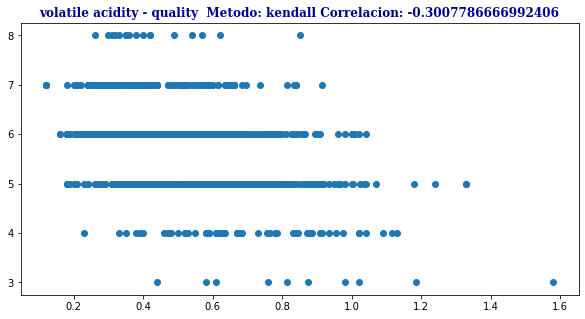

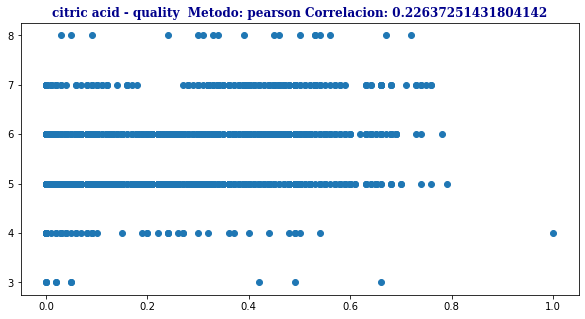

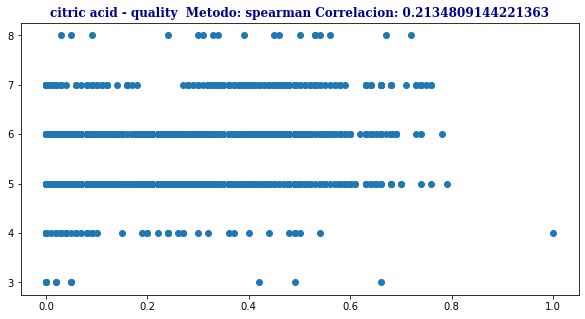

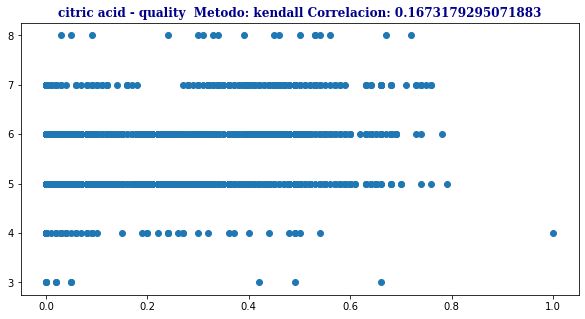

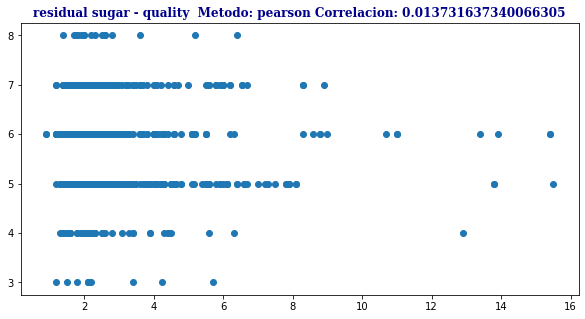

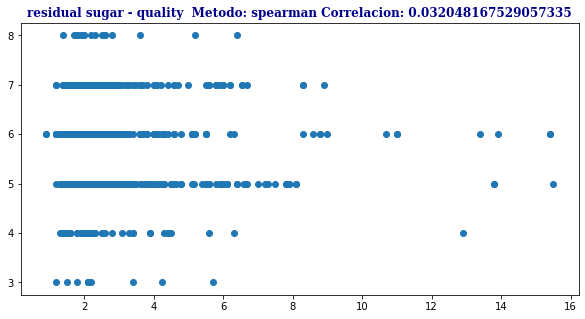

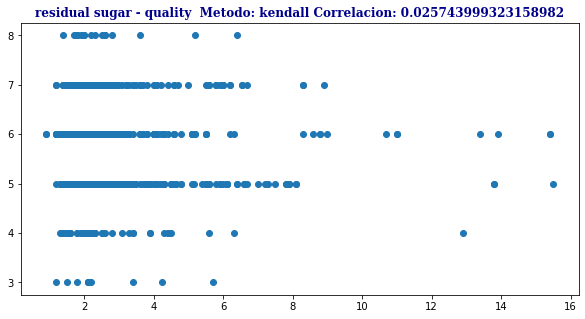

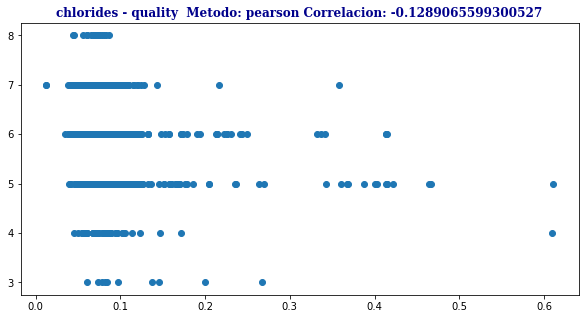

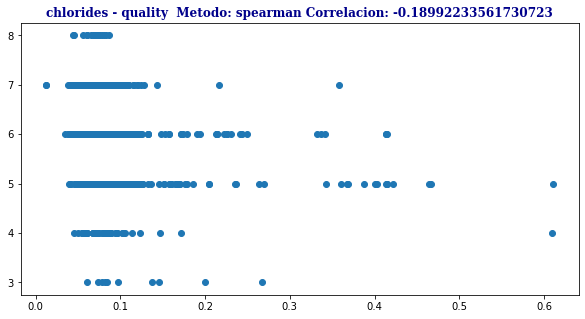

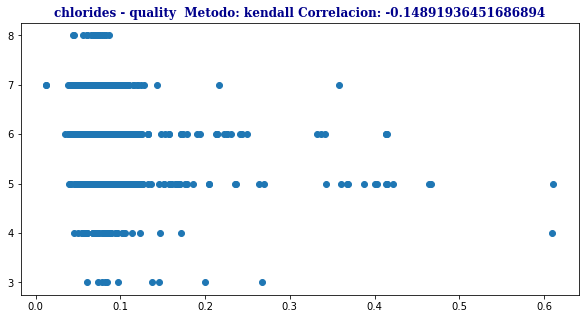

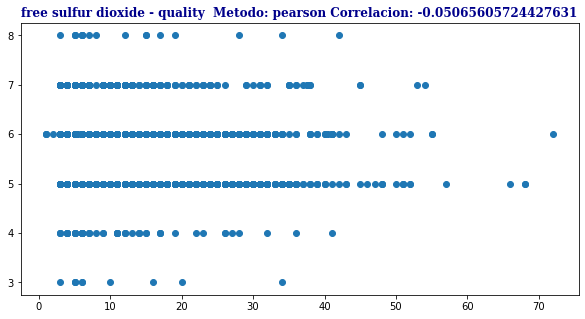

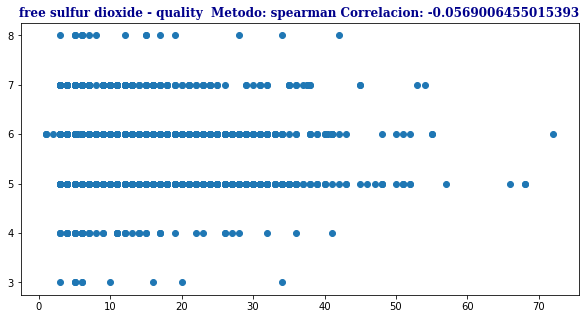

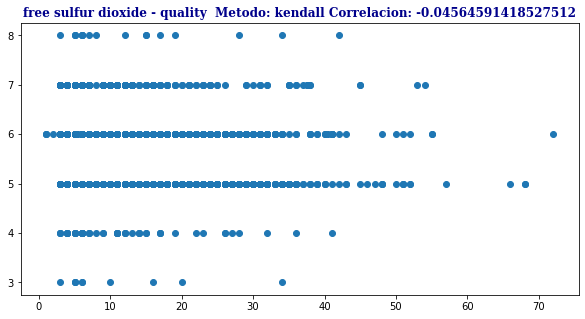

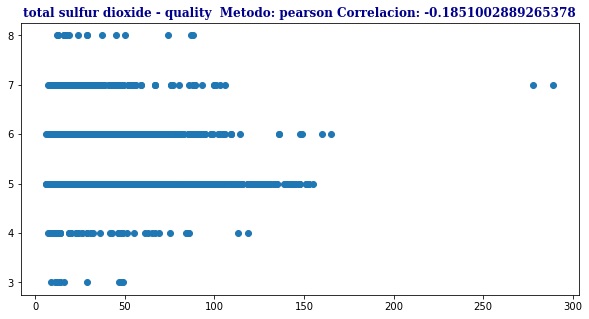

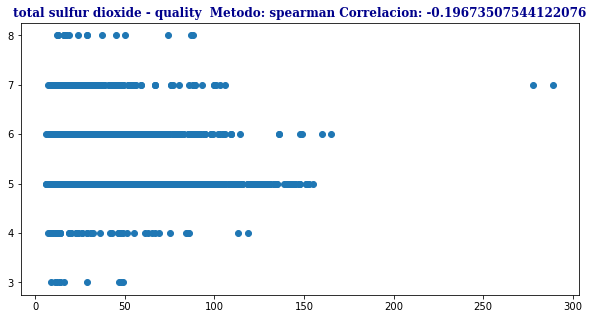

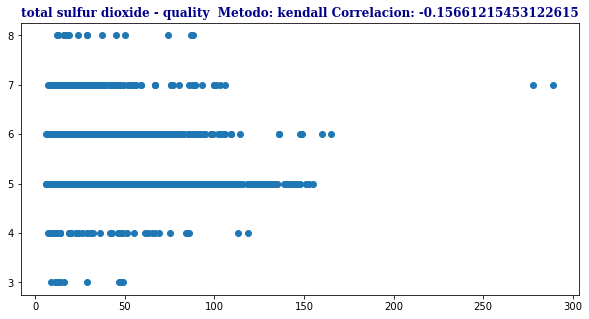

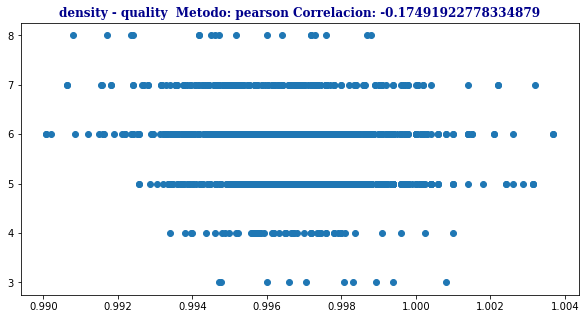

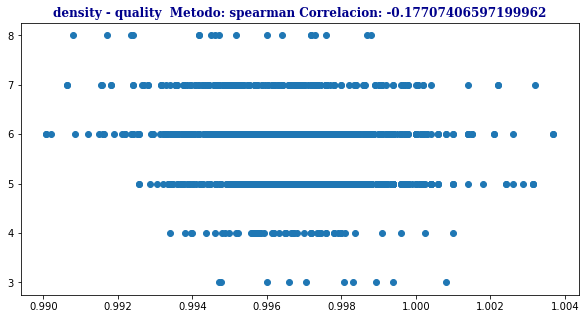

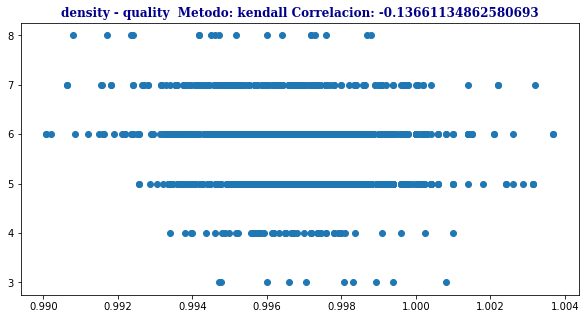

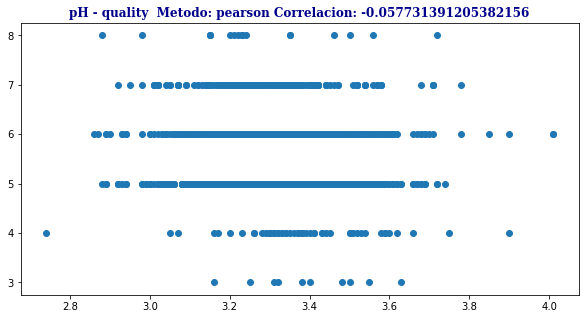

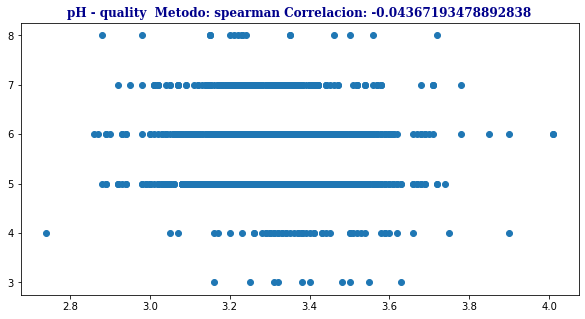

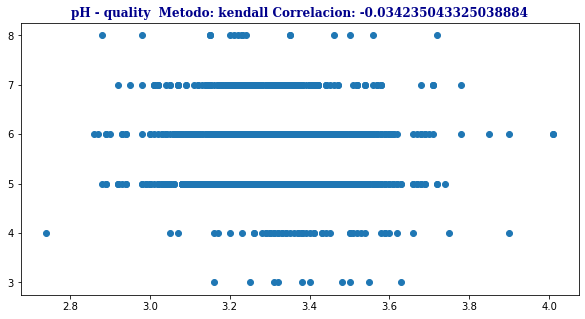

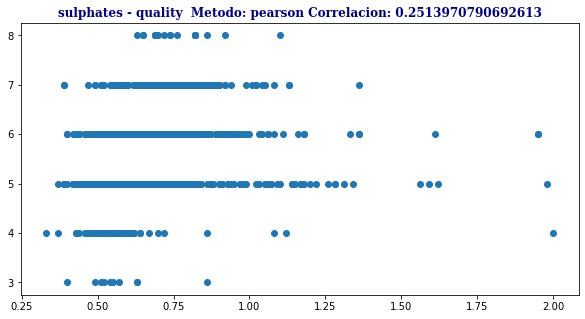

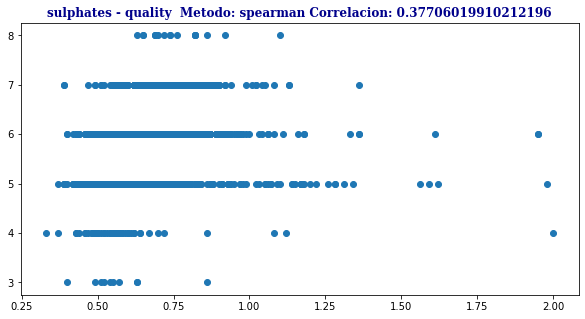

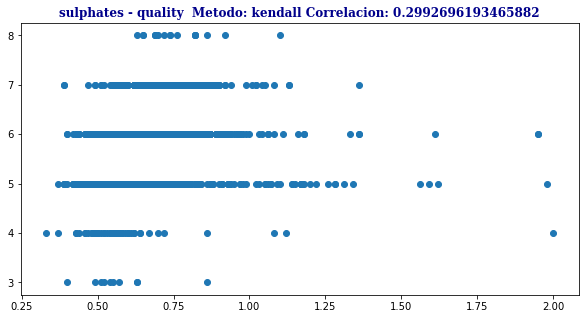

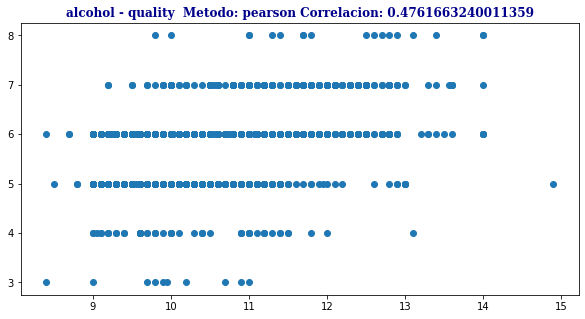

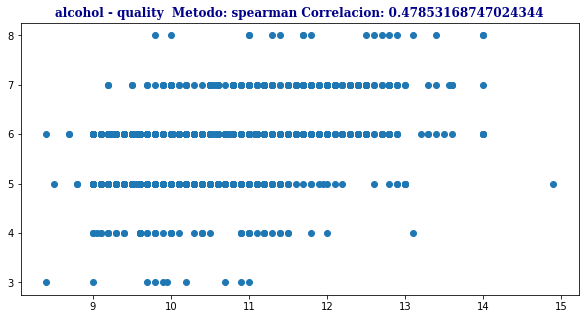

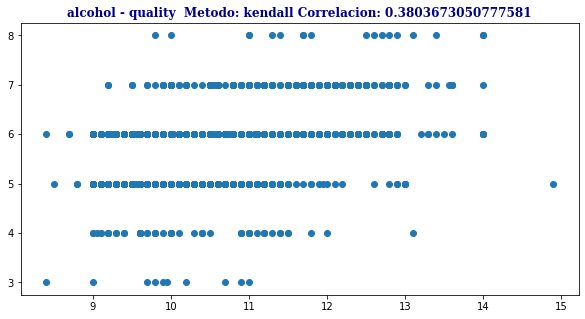

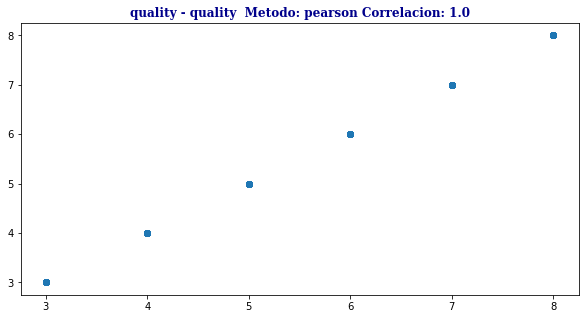

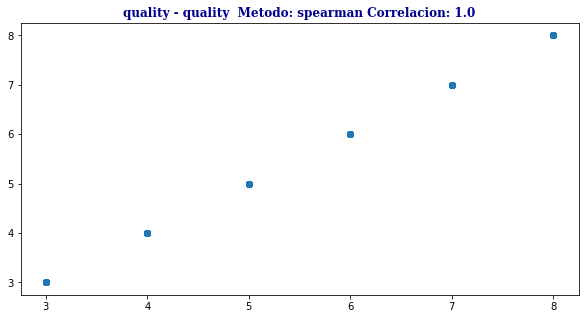

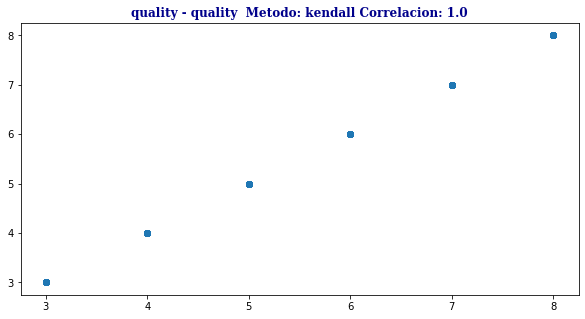

In [62]:
##CORRELACIONES
fields = data.columns.tolist()
methods = ['pearson', 'spearman', 'kendall']
correlaciones = [[],[],[],[]]
cont = 0
for variable_x in fields:
    for m in methods:
        correlacion = data[variable_x].corr(data['quality'], method=m)
        plt.figure(figsize = (10,5))
        plt.scatter(data = data, x = variable_x, y = 'quality')
        plt.title(str(variable_x) + " - quality  Metodo: " +str(m) + " Correlacion: " + str(correlacion) , 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 12})
        correlaciones[cont].append([variable_x,'quality',m,correlacion])
        
        

In [63]:
correlaciones
df_correlaciones = pd.DataFrame(correlaciones[0], columns=['var x', 'var y', 'metodo', 'puntuacion'])
df_correlaciones

,var x,var y,metodo,puntuacion
0,fixed acidity,quality,pearson,0.124052
1,fixed acidity,quality,spearman,0.114084
2,fixed acidity,quality,kendall,0.087966
3,volatile acidity,quality,pearson,-0.390558
4,volatile acidity,quality,spearman,-0.380647
5,volatile acidity,quality,kendall,-0.300779
6,citric acid,quality,pearson,0.226373
7,citric acid,quality,spearman,0.213481
8,citric acid,quality,kendall,0.167318
9,residual sugar,quality,pearson,0.013732


In [77]:
# Los mejores dos correlaciones del metodo pearson
df_correlaciones_pearson = df_correlaciones[df_correlaciones['metodo'] == 'pearson']
df_correlaciones_pearson = df_correlaciones_pearson[df_correlaciones_pearson['var x'] != 'SalePrice']
df_correlaciones_pearson.sort_values(by="puntuacion", ascending=False).head(15)

,var x,var y,metodo,puntuacion
33,quality,quality,pearson,1.000000
30,alcohol,quality,pearson,0.476166
27,sulphates,quality,pearson,0.251397
6,citric acid,quality,pearson,0.226373
0,fixed acidity,quality,pearson,0.124052
9,residual sugar,quality,pearson,0.013732
15,free sulfur dioxide,quality,pearson,-0.050656
24,pH,quality,pearson,-0.057731
12,chlorides,quality,pearson,-0.128907
21,density,quality,pearson,-0.174919


In [78]:
df_correlaciones_pearson.sort_values(by="puntuacion", ascending=True).head(15)

,var x,var y,metodo,puntuacion
3,volatile acidity,quality,pearson,-0.390558
18,total sulfur dioxide,quality,pearson,-0.185100
21,density,quality,pearson,-0.174919
12,chlorides,quality,pearson,-0.128907
24,pH,quality,pearson,-0.057731
15,free sulfur dioxide,quality,pearson,-0.050656
9,residual sugar,quality,pearson,0.013732
0,fixed acidity,quality,pearson,0.124052
6,citric acid,quality,pearson,0.226373
27,sulphates,quality,pearson,0.251397


con esto podemos ver que las mejores 5 variables predictoras son alcohol, sulphates, citric acid, fixed acidity y residual sugar y ademas la variable volatile acidity que es la mayor negativa, por lo tanto usaremos las mas significativas que en este caso son: slcohol, sulphates y volatile acidity

In [69]:
mask = int(0.8 * len(data))
train_data = data[:mask]
test_data = data[mask:]

df_train, df_test = pd.DataFrame(train_data, columns = fields), pd.DataFrame(test_data, columns = fields)

print(f"No. datos training: {train_data.shape[0]}")
print(f"No. datos test: {test_data.shape[0]}")

No. datos training: 1279
No. datos test: 320


In [108]:
##Ahora vamos a tomar estas 3 variables mas significativas
train_data_x = train_data[['alcohol', 'volatile acidity']]
train_data_x

,alcohol,volatile acidity
0,9.4,0.700
1,9.8,0.880
2,9.8,0.760
3,9.8,0.280
4,9.4,0.700
...,...,...
1274,11.2,0.580
1275,9.5,0.715
1276,12.0,0.400
1277,9.7,0.690


In [109]:
train_data_y = train_data[['quality']]
train_data_y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1274,6
1275,6
1276,4
1277,6


In [110]:
##caracteristicas polinomiales
train_data_x.columns = ['a', 'b']
train_data_x['ab'] =  train_data_x['a'] * train_data_x['b']
train_data_x['aˆ2'] =  train_data_x['a'] * train_data_x['a']
train_data_x['bˆ2'] =  train_data_x['b'] * train_data_x['b']
train_data_x.insert(0,'',1)#intercepto

k = train_data_x.shape[1]
train_data_x

/var/folders/rl/659_2p794j73tgklrf6382lw0000gn/T/ipykernel_31540/1536117020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_x['ab'] =  train_data_x['a'] * train_data_x['b']
/var/folders/rl/659_2p794j73tgklrf6382lw0000gn/T/ipykernel_31540/1536117020.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_x['aˆ2'] =  train_data_x['a'] * train_data_x['a']
/var/folders/rl/659_2p794j73tgklrf6382lw0000gn/T/ipykernel_31540/1536117020.py:5: SettingWithCopyWarning: 
A value is trying to be set 

,,a,b,ab,aˆ2,bˆ2
0,1,9.4,0.700,6.5800,88.36,0.490000
1,1,9.8,0.880,8.6240,96.04,0.774400
2,1,9.8,0.760,7.4480,96.04,0.577600
3,1,9.8,0.280,2.7440,96.04,0.078400
4,1,9.4,0.700,6.5800,88.36,0.490000
...,...,...,...,...,...,...
1274,1,11.2,0.580,6.4960,125.44,0.336400
1275,1,9.5,0.715,6.7925,90.25,0.511225
1276,1,12.0,0.400,4.8000,144.00,0.160000
1277,1,9.7,0.690,6.6930,94.09,0.476100


Modelo

In [111]:
tf.reset_default_graph()
g=tf.Graph()
with g.as_default():
    tensor_x = tf.placeholder(tf.float32, shape = (None, k), name = 'tensor_x')
    tensor_y = tf.placeholder(tf.float32, shape = (None, 1), name = 'tensor_y')
    lr = tf.placeholder(tf.float32, name = 'lr')
    w = tf.Variable(tf.zeros([k,1], tf.float32), name = 'w')
    with tf.name_scope('hipotesis'):
        yhat = tf.matmul(tensor_x,w, name = 'yhat')
        
    with tf.name_scope('costo'):
        costo = tf.divide(tf.reduce_mean(tf.pow(yhat-tensor_y,2)),2., name='f_costo')
        
    with tf.name_scope('GradientDes.Optimezer'):
        optimizer = tf.summary.scalar(name='f_costo', tensor=costo)
        CostSummary = tf.summary.scalar(name='f_costo', tensor = costo)
        
    init = tf.global_variables_initializer()

Training

In [118]:
def training_modelo(x,y,epochs,learning_rate,printC):
    with tf.Session(graph = g) as sess:
        writer = tf.summary.FileWriter('poli/k=' + str(k) + '-lr=' + str(learning_rate), sess.graph)
        sess.run(init)
        
        for epoch in range(epochs):
            _, summary = sess.run([optimizer, CostSummary], feed_dict = {tensor_x:x, tensor_y:y, lr:learning_rate})
            writer.add_summary(summary, epoch + 1 )
            
            if(epoch+1) % printC ==0:
                c, weights = sess.run([costo,w], feed_dict={tensor_x:x, tensor_y:y})
                print("Epoch: " + str(epoch + 1) + ' K: ' + str(k) + ' Costo: ' + str(c) + ' W: ' +str(weights[:3,0]))
        writer.close()
        finalCost = sess.run(costo, feed_dict = {tensor_x:x, tensor_y:y})
        weights = sess.run(w)
    return(weights)


In [122]:
weights = training_modelo(train_data_x, train_data_y, 500, 0.0001, 10)

Epoch: 10 K: 6 Costo: 16.369038 W: [0. 0. 0.]
Epoch: 20 K: 6 Costo: 16.369038 W: [0. 0. 0.]
Epoch: 30 K: 6 Costo: 16.369038 W: [0. 0. 0.]
Epoch: 40 K: 6 Costo: 16.369038 W: [0. 0. 0.]
Epoch: 50 K: 6 Costo: 16.369038 W: [0. 0. 0.]
Epoch: 60 K: 6 Costo: 16.369038 W: [0. 0. 0.]
Epoch: 70 K: 6 Costo: 16.369038 W: [0. 0. 0.]
Epoch: 80 K: 6 Costo: 16.369038 W: [0. 0. 0.]
Epoch: 90 K: 6 Costo: 16.369038 W: [0. 0. 0.]
Epoch: 100 K: 6 Costo: 16.369038 W: [0. 0. 0.]
Epoch: 110 K: 6 Costo: 16.369038 W: [0. 0. 0.]
Epoch: 120 K: 6 Costo: 16.369038 W: [0. 0. 0.]
Epoch: 130 K: 6 Costo: 16.369038 W: [0. 0. 0.]
Epoch: 140 K: 6 Costo: 16.369038 W: [0. 0. 0.]
Epoch: 150 K: 6 Costo: 16.369038 W: [0. 0. 0.]
Epoch: 160 K: 6 Costo: 16.369038 W: [0. 0. 0.]
Epoch: 170 K: 6 Costo: 16.369038 W: [0. 0. 0.]
Epoch: 180 K: 6 Costo: 16.369038 W: [0. 0. 0.]
Epoch: 190 K: 6 Costo: 16.369038 W: [0. 0. 0.]
Epoch: 200 K: 6 Costo: 16.369038 W: [0. 0. 0.]
Epoch: 210 K: 6 Costo: 16.369038 W: [0. 0. 0.]
Epoch: 220 K: 6 Costo: